importaciones

In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Carga del conjunto de datos

In [2]:
mnist = keras.datasets.mnist

Entrenamiento y prueba

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Normalización de los datos

In [4]:
training_images = training_images / 255.0
test_images = test_images / 255.0

Construcción del modelo

In [5]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

Compilación del modelo

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Entrenamiento del modelo

Epoch 1/10
1875/1875 [==============================] - 12s 3ms/step - loss: 0.1429 - accuracy: 0.9571
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0480 - accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0308 - accuracy: 0.9907
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0201 - accuracy: 0.9936
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0138 - accuracy: 0.9955
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0109 - accuracy: 0.9962
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0077 - accuracy: 0.9977
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0069 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0060 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

<function matplotlib.pyplot.show(close=None, block=None)>

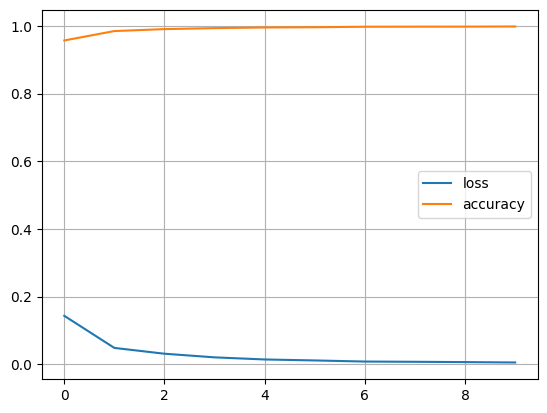

In [7]:
history = model.fit(training_images, training_labels, epochs=10)
pd.DataFrame(history.history).plot(grid=True)
plt.show

Evaluación del modelo

In [8]:
loss, accuracy = model.evaluate(training_images, training_labels)
print(f'Pérdida en el conjunto de entrenamiento: {loss}')
print(f'Precisión en el conjunto de entrenamiento: {accuracy}')

loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0063 - accuracy: 0.9979
Pérdida en el conjunto de entrenamiento: 0.006265369243919849
Precisión en el conjunto de entrenamiento: 0.9978500008583069
313/313 [==============================] - 1s 3ms/step - loss: 0.0585 - accuracy: 0.9855
Pérdida en el conjunto de prueba: 0.05851958692073822
Precisión en el conjunto de prueba: 0.9854999780654907


Predicción

In [9]:
index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification: {classification.reshape(-1, 1)}')

Label: 2
1/1 [==============================] - 0s 147ms/step
Classification: [[2.3789066e-17]
 [9.5699233e-11]
 [1.0000000e+00]
 [5.7819804e-21]
 [1.3535722e-20]
 [9.9165817e-23]
 [1.8400103e-16]
 [1.8334066e-20]
 [4.2087516e-19]
 [1.5767151e-18]]


Visualización de muestras

In [10]:
print(test_labels[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [11]:
FIRST_IMAGE = 3
SECOND_IMAGE = 10
THIRD_IMAGE = 25

print(test_labels[FIRST_IMAGE])
print(test_labels[SECOND_IMAGE])
print(test_labels[THIRD_IMAGE])

0
0
0


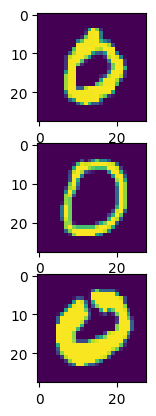

In [13]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

Extracción de activaciones

In [14]:
layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

Visualización de convoluciones

1/1 [==============================] - 0s 25ms/step


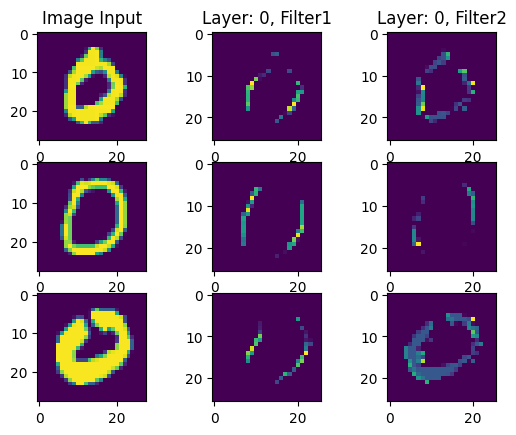

In [15]:
f, axarr = plt.subplots(3,3)

axarr[0, 0].set_title("Image Input")
axarr[0, 0].imshow(test_images[FIRST_IMAGE])
f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[0, 1].set_title("Layer: " + str(layer) + ", Filter1")
axarr[0, 1].imshow(f1[0, :, :, filter1])
axarr[0, 2].set_title("Layer: " + str(layer) + ", Filter2")
axarr[0, 2].imshow(f1[0, :, :, filter2])

axarr[1, 0].imshow(test_images[SECOND_IMAGE])
f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[1, 1].imshow(f2[0, :, :, filter1])
axarr[1, 2].imshow(f2[0, :, :, filter2])

axarr[2, 0].imshow(test_images[THIRD_IMAGE])
f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[2, 1].imshow(f3[0, :, :, filter1])
axarr[2, 2].imshow(f3[0, :, :, filter2])